# EE658/758 Machine Learning in Engineering
# Final Project
# Spring 2023
# Zachary Chou 

# Part A: Cleaning the Data 

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
# Read the csv file 
adult = pd.read_csv('adult-entire dataset.csv')

print(adult) 

       age          workClass    Education       marital-status  \
0       39          State-gov    Bachelors        Never-married   
1       50   Self-emp-not-inc    Bachelors   Married-civ-spouse   
2       38            Private      HS-grad             Divorced   
3       53            Private         11th   Married-civ-spouse   
4       28            Private    Bachelors   Married-civ-spouse   
...    ...                ...          ...                  ...   
32556   27            Private   Assoc-acdm   Married-civ-spouse   
32557   40            Private      HS-grad   Married-civ-spouse   
32558   58            Private      HS-grad              Widowed   
32559   22            Private      HS-grad        Never-married   
32560   52       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    race      sex  hours-per-week  Income  
0            Adm-clerical   White     Male              40   <=50K  
1         Exec-managerial   White     Male              1

In [3]:
# Replacing column titles 
adult = adult.rename(columns={'marital-status': 'maritalStatus', 'hours-per-week': 'hoursPerWeek'})
print(adult)

       age          workClass    Education        maritalStatus  \
0       39          State-gov    Bachelors        Never-married   
1       50   Self-emp-not-inc    Bachelors   Married-civ-spouse   
2       38            Private      HS-grad             Divorced   
3       53            Private         11th   Married-civ-spouse   
4       28            Private    Bachelors   Married-civ-spouse   
...    ...                ...          ...                  ...   
32556   27            Private   Assoc-acdm   Married-civ-spouse   
32557   40            Private      HS-grad   Married-civ-spouse   
32558   58            Private      HS-grad              Widowed   
32559   22            Private      HS-grad        Never-married   
32560   52       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    race      sex  hoursPerWeek  Income  
0            Adm-clerical   White     Male            40   <=50K  
1         Exec-managerial   White     Male            13   <=

In [4]:
# Viewing how many values are there for each categorial column 
print(adult.workClass.value_counts())

print(adult.Education.value_counts())

print(adult.maritalStatus.value_counts())

print(adult.occupation.value_counts())

print(adult.race.value_counts())

print(adult.sex.value_counts())

print(adult.Income.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workClass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalStatus, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial 

In [5]:
# Check data info initially 
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workClass      32561 non-null  object
 2   Education      32561 non-null  object
 3   maritalStatus  32561 non-null  object
 4   occupation     32561 non-null  object
 5   race           32561 non-null  object
 6   sex            32561 non-null  object
 7   hoursPerWeek   32561 non-null  int64 
 8   Income         32561 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


In [6]:
# Dealing with missing data by dropping the ones that have a ? 
adult.replace(' ?', np.nan, inplace=True)
adult.dropna(inplace=True)
print(adult.workClass.value_counts())
print(adult.occupation.value_counts())
adult.info()
adult

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workClass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30718 non-null  int64 
 1   workClass      30718 non-null  object
 2   Education      30718 non-null  object
 3   maritalStatus  30718 non-null  object
 4   o

,age,workClass,Education,maritalStatus,occupation,race,sex,hoursPerWeek,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,<=50K


In [7]:
# Substitute dummy columns for the categorical variables
new_cols = pd.get_dummies(adult["workClass"])
adult = adult.join(new_cols,how="outer")
adult.drop("workClass",axis=1,inplace=True)
adult

,age,Education,maritalStatus,occupation,race,sex,hoursPerWeek,Income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,Bachelors,Never-married,Adm-clerical,White,Male,40,<=50K,0,0,0,0,0,1,0
1,50,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K,0,0,0,0,1,0,0
2,38,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K,0,0,1,0,0,0,0
3,53,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K,0,0,1,0,0,0,0
4,28,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,<=50K,0,0,1,0,0,0,0
32557,40,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,>50K,0,0,1,0,0,0,0
32558,58,HS-grad,Widowed,Adm-clerical,White,Female,40,<=50K,0,0,1,0,0,0,0
32559,22,HS-grad,Never-married,Adm-clerical,White,Male,20,<=50K,0,0,1,0,0,0,0


In [8]:
new_cols = pd.get_dummies(adult["Education"])
adult = adult.join(new_cols,how="outer")
adult.drop("Education",axis=1,inplace=True)
adult

,age,maritalStatus,occupation,race,sex,hoursPerWeek,Income,Federal-gov,Local-gov,Private,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,39,Never-married,Adm-clerical,White,Male,40,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38,Divorced,Handlers-cleaners,White,Male,40,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,28,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Married-civ-spouse,Tech-support,White,Female,38,<=50K,0,0,1,...,0,1,0,0,0,0,0,0,0,0
32557,40,Married-civ-spouse,Machine-op-inspct,White,Male,40,>50K,0,0,1,...,0,0,0,0,0,1,0,0,0,0
32558,58,Widowed,Adm-clerical,White,Female,40,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,0
32559,22,Never-married,Adm-clerical,White,Male,20,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
new_cols = pd.get_dummies(adult["maritalStatus"])
adult = adult.join(new_cols,how="outer")
adult.drop("maritalStatus",axis=1,inplace=True)
adult

,age,occupation,race,sex,hoursPerWeek,Income,Federal-gov,Local-gov,Private,Self-emp-inc,...,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,Adm-clerical,White,Male,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Exec-managerial,White,Male,13,<=50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,Handlers-cleaners,White,Male,40,<=50K,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,53,Handlers-cleaners,Black,Male,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,Prof-specialty,Black,Female,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Tech-support,White,Female,38,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32557,40,Machine-op-inspct,White,Male,40,>50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,Adm-clerical,White,Female,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,Adm-clerical,White,Male,20,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
new_cols = pd.get_dummies(adult["occupation"])
adult = adult.join(new_cols,how="outer")
adult.drop("occupation",axis=1,inplace=True)
adult

,age,race,sex,hoursPerWeek,Income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,White,Male,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,White,Male,13,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,38,White,Male,40,<=50K,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,Black,Male,40,<=50K,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,Black,Female,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,White,Female,38,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,40,White,Male,40,>50K,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,58,White,Female,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,White,Male,20,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
new_cols = pd.get_dummies(adult["race"])
adult = adult.join(new_cols,how="outer")
adult.drop("race",axis=1,inplace=True)
adult

,age,sex,hoursPerWeek,Income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,Male,40,<=50K,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,50,Male,13,<=50K,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Male,40,<=50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,Male,40,<=50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Female,40,<=50K,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Female,38,<=50K,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32557,40,Male,40,>50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Female,40,<=50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,Male,20,<=50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# changing all categorial data into numerical that greatly impact the income 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
adult['sex'] = le.fit_transform(adult.sex)

le1 = LabelEncoder()
adult['Income'] = le.fit_transform(adult.Income)

print(adult)

       age  sex  hoursPerWeek  Income   Federal-gov   Local-gov   Private  \
0       39    1            40       0             0           0         0   
1       50    1            13       0             0           0         0   
2       38    1            40       0             0           0         1   
3       53    1            40       0             0           0         1   
4       28    0            40       0             0           0         1   
...    ...  ...           ...     ...           ...         ...       ...   
32556   27    0            38       0             0           0         1   
32557   40    1            40       1             0           0         1   
32558   58    0            40       0             0           0         1   
32559   22    1            20       0             0           0         1   
32560   52    0            40       1             0           0         0   

        Self-emp-inc   Self-emp-not-inc   State-gov  ...   Prof-specialty  

In [13]:
# Presenting table after data cleaning
adult.drop(adult.iloc[:,4:53],axis=1,inplace=True)
print(adult)

       age  sex  hoursPerWeek  Income
0       39    1            40       0
1       50    1            13       0
2       38    1            40       0
3       53    1            40       0
4       28    0            40       0
...    ...  ...           ...     ...
32556   27    0            38       0
32557   40    1            40       1
32558   58    0            40       0
32559   22    1            20       0
32560   52    0            40       1

[30718 rows x 4 columns]


# Part B: Dimensionality Reduction 

In [14]:
# Doing dimensionality reduction using PCA 
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(adult)
xpca = pca.transform(adult)
adult.shape, xpca.shape

((30718, 4), (30718, 2))

In [15]:
# Showing eigenvectors and eigenvalues from PCA
print("\nThe eigen vectors from PCA is: \n",pca.components_) 
print("\nThe eigen values from PCA is: \n",pca.explained_variance_)


The eigen vectors from PCA is: 
 [[ 0.9119469   0.00552506  0.41015597  0.00971603]
 [-0.41023772  0.00712666  0.91194291  0.00378943]]

The eigen values from PCA is: 
 [179.30991383 136.45860994]


In [16]:
# Doing dimensionality reduction using SVD with eigen vectors and eigen values 
U, s, VT = np.linalg.svd(adult)
print('Eigen-vectors: U=\n', U, U.shape,'\n')
print('Eigen-values: s=', s, s.shape)
print('Eigen-vectors: VT=', VT.shape,'\n')

Eigen-vectors: U=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (30718, 30718) 

Eigen-values: s= [1. 1. 1. 1.] (4,)
Eigen-vectors: VT= (4, 4) 



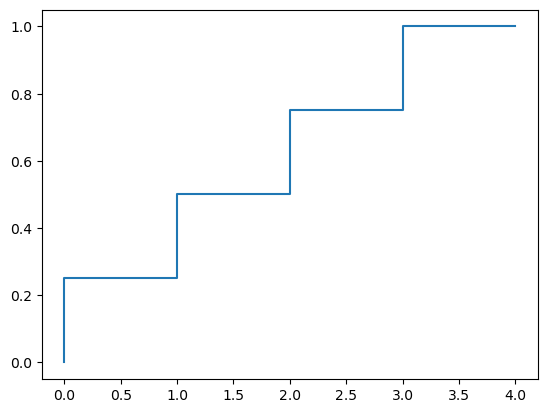

sv = [0.   0.25 0.5  0.75 1.  ]


In [17]:
# The scree plot
sv = np.cumsum(s)/sum(s)
# np.insert(sv, 0, 0) - insert the value 0 in position 0 of array sv
sv = np.insert(sv, 0, 0)
plt.step(list(range(len(sv))), sv)
plt.show()
print('sv =', sv)

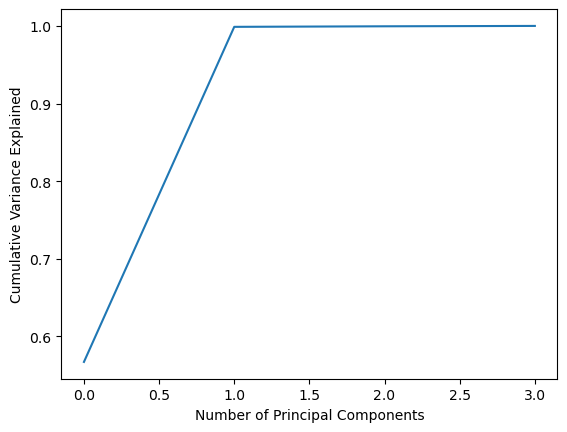

In [21]:
# Number of dimensions data set should use to retain over 90% of the data variance
pca = PCA(n_components=None)

# Fit PCA to the data
pca.fit(adult)

# Extract the cumulative variance for each component 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Part C: Model Traning 

In [23]:
# Define X and y dataframes
X = adult.loc[:,['age','sex','hoursPerWeek'
             ]].values

y = adult.loc[:,['Income']].values 

print('X data frame is \n',X)

print('\ny data frame is \n',y)

X data frame is 
 [[39  1 40]
 [50  1 13]
 [38  1 40]
 ...
 [58  0 40]
 [22  1 20]
 [52  0 40]]

y data frame is 
 [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [24]:
# Turn dataframes into arrays 
data = pd.DataFrame(X)

X = data.to_numpy()

display(X) 

Data = pd.DataFrame(y)

y = Data.to_numpy()

display(y)

array([[39,  1, 40],
       [50,  1, 13],
       [38,  1, 40],
       ...,
       [58,  0, 40],
       [22,  1, 20],
       [52,  0, 40]], dtype=int64)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [25]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

print('Normalized X data is \n',X)
print('\nNormalized y data is \n',y)

Normalized X data is 
 [[ 0.04241621  0.69114357 -0.0792072 ]
 [ 0.88095778  0.69114357 -2.33198808]
 [-0.03381484  0.69114357 -0.0792072 ]
 ...
 [ 1.4908062  -1.44687739 -0.0792072 ]
 [-1.25351168  0.69114357 -1.74793378]
 [ 1.03341989 -1.44687739 -0.0792072 ]]

Normalized y data is 
 [[-0.57587171]
 [-0.57587171]
 [-0.57587171]
 ...
 [-0.57587171]
 [-0.57587171]
 [ 1.73649787]]


In [26]:
# Split the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[-0.262508   -1.44687739 -0.0792072 ]
 [-0.03381484  0.69114357  0.75515609]
 [-1.02481852  0.69114357 -0.0792072 ]
 ...
 [-0.262508   -1.44687739 -0.0792072 ]
 [-0.87235642  0.69114357 -0.0792072 ]
 [ 1.26211304  0.69114357  4.84353621]]

X_test= 
 [[ 0.65226463 -1.44687739 -0.0792072 ]
 [-0.33873905  0.69114357 -0.0792072 ]
 [ 0.04241621 -1.44687739  0.5048471 ]
 ...
 [ 0.04241621  0.69114357 -0.0792072 ]
 [ 0.27110937  0.69114357  4.09260925]
 [-1.17728062  0.69114357 -0.0792072 ]]

y_train= 
 [[-0.57587171]
 [-0.57587171]
 [-0.57587171]
 ...
 [-0.57587171]
 [-0.57587171]
 [-0.57587171]]

y_test= 
 [[-0.57587171]
 [-0.57587171]
 [-0.57587171]
 ...
 [ 1.73649787]
 [ 1.73649787]
 [-0.57587171]]


In [31]:
# Using the multi-layer preceptron to build a predictive neural network model with two hidden layers.
# Also show the confusion matrix and classification report 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

X = adult.drop('Income', axis=1)
y = adult['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47, stratify = y)

mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

In [32]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[6535  386]
 [1764  531]]


In [33]:
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      6921
           1       0.58      0.23      0.33      2295

    accuracy                           0.77      9216
   macro avg       0.68      0.59      0.59      9216
weighted avg       0.74      0.77      0.73      9216



In [34]:
# Do problem with logistic regression from Scikit library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
Lr = LogisticRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47, stratify = y)

X = adult.drop('Income', axis=1)
y = adult['Income']

le = LabelEncoder()
y_train = le.fit_transform(y_train)

Lr.fit(X_train,y_train)

y_pred = Lr.predict(X_test)

In [37]:
# Show confusion matrix
print('Confusion Matrix for Neural Network', confusion_matrix(y_test, y_pred))

Confusion Matrix for Neural Network [[6532  389]
 [1940  355]]


In [38]:
# Show classification report for trained network on test dataset 
print('Accuracy:', accuracy_score(y_test, y_pred))

print('F1 Score:', f1_score(y_test, y_pred, average="binary"))

print('Precision:', precision_score(y_test, y_pred, average="binary"))

print('Recall:', recall_score(y_test, y_pred, average="binary")) 

print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7472873263888888
F1 Score: 0.2336294833826917
Precision: 0.4771505376344086
Recall: 0.15468409586056645
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      6921
           1       0.48      0.15      0.23      2295

    accuracy                           0.75      9216
   macro avg       0.62      0.55      0.54      9216
weighted avg       0.70      0.75      0.70      9216



In [40]:
# Incoporating Naive Bayes 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [41]:
model.fit(X_train,y_train)

GaussianNB()

In [42]:
predicted = model.predict(X_test)
print(predicted)

[0 0 0 ... 0 1 0]


In [43]:
# Using K-means clustering on data without income column 
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47, stratify = y)

X = adult.drop('Income', axis=1)
y = adult['Income']

kmeans = KMeans(n_clusters = 10,random_state = 0)
kmeans.fit(X_train,y_train)
predictions = kmeans.predict(X_test)


In [48]:
# Finding the accuracy
from scipy.stats import mode
labels = np.zeros_like(predictions)
for i in range(10):
    mask = (predictions == i)
    labels[mask] = mode(y_test[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

C:\Users\choub\AppData\Local\Temp\ipykernel_24640\1713543851.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_test[mask])[0]


0.7616102430555556

## DUE DATE: Friday, April 28, 2023